Loading /workspaces/codespaces-practice/testing/best_openvino_model for OpenVINO inference...

0: 640x640 2 fishs, 2418.1ms
Speed: 1130.8ms preprocess, 2418.1ms inference, 673.5ms postprocess per image at shape (1, 3, 640, 640)


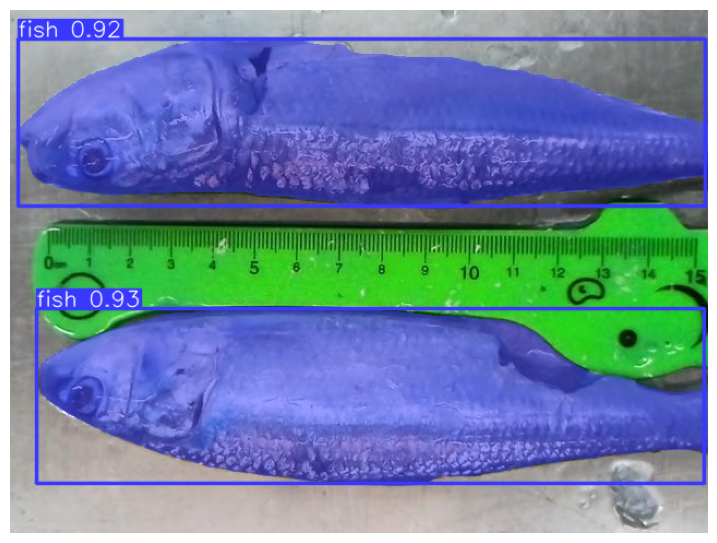

In [1]:
# import libraries for testing
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import io

image = r"/workspaces/codespaces-practice/testing/2024-12-03_10_19_29_(17702)_sardine_input.jpeg"
img = Image.open(image) 
if img.mode != 'RGB':
    img = img.convert('RGB')
img_byte_arr = io.BytesIO()
img.save(img_byte_arr, format=img.format)
img_byte_arr = img_byte_arr.getvalue()
img_from_bytes = Image.open(io.BytesIO(img_byte_arr))
image = np.asarray(img_from_bytes)

fish_model = r"/workspaces/codespaces-practice/testing/best_openvino_model"
# fish_model = r"C:\Users\sowmy\Downloads\sardine-repro(old)\mobile app models non ov\fish (2).pt"
yolo = YOLO(fish_model, task='segment')
pred = yolo.predict(image[:, :, ::-1], conf=0.75)
for p in pred:
    plt.figure(figsize=(9, 9))
    plt.imshow(p.plot())
    plt.axis('off')